# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | winsford
Processing Record 11 of Set 1 | enewetak
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | akureyri
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | newman
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | espargos
City not found. Skipping...
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | l

Processing Record 43 of Set 4 | olonkinbyen
Processing Record 44 of Set 4 | tazovsky
Processing Record 45 of Set 4 | ceeldheer
Processing Record 46 of Set 4 | yudong
Processing Record 47 of Set 4 | polyarnyy
Processing Record 48 of Set 4 | deridder
Processing Record 49 of Set 4 | cidreira
Processing Record 0 of Set 5 | cape canaveral
Processing Record 1 of Set 5 | holualoa
Processing Record 2 of Set 5 | chela
Processing Record 3 of Set 5 | kone
Processing Record 4 of Set 5 | udachny
Processing Record 5 of Set 5 | antofagasta
Processing Record 6 of Set 5 | charles city
Processing Record 7 of Set 5 | tyre
Processing Record 8 of Set 5 | ovalle
Processing Record 9 of Set 5 | midvagur
Processing Record 10 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 11 of Set 5 | arkhangel'sk
Processing Record 12 of Set 5 | port lincoln
Processing Record 13 of Set 5 | mathba
Processing Record 14 of Set 5 | macapa
Processing Record 15 of Set 5 | tsengel
Processing Record 16 of Set 5 | ha

Processing Record 31 of Set 8 | aasiaat
Processing Record 32 of Set 8 | luderitz
Processing Record 33 of Set 8 | zapolyarnyy
Processing Record 34 of Set 8 | bikenibeu village
Processing Record 35 of Set 8 | yeniseysk
Processing Record 36 of Set 8 | kourou
Processing Record 37 of Set 8 | carnot
Processing Record 38 of Set 8 | ifatsy
City not found. Skipping...
Processing Record 39 of Set 8 | weno
Processing Record 40 of Set 8 | salekhard
Processing Record 41 of Set 8 | necochea
Processing Record 42 of Set 8 | aitape
Processing Record 43 of Set 8 | howard springs
Processing Record 44 of Set 8 | la ronge
Processing Record 45 of Set 8 | bada
Processing Record 46 of Set 8 | oneonta
Processing Record 47 of Set 8 | suva
Processing Record 48 of Set 8 | gaspe
Processing Record 49 of Set 8 | antsiranana
Processing Record 0 of Set 9 | mangrol
Processing Record 1 of Set 9 | axim
Processing Record 2 of Set 9 | saint-philippe
Processing Record 3 of Set 9 | chibougamau
Processing Record 4 of Set 9 | 

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-32.39,98,100,0.28,RU,1702947365
1,port elizabeth,-33.9180,25.5701,17.28,92,0,2.06,ZA,1702947365
2,talnakh,69.4865,88.3972,-12.66,74,100,9.87,RU,1702947365
3,margaret river,-33.9500,115.0667,20.27,42,0,4.89,AU,1702947366
4,hermanus,-34.4187,19.2345,13.78,77,0,4.39,ZA,1702947366


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-32.39,98,100,0.28,RU,1702947365
1,port elizabeth,-33.9180,25.5701,17.28,92,0,2.06,ZA,1702947365
2,talnakh,69.4865,88.3972,-12.66,74,100,9.87,RU,1702947365
3,margaret river,-33.9500,115.0667,20.27,42,0,4.89,AU,1702947366
4,hermanus,-34.4187,19.2345,13.78,77,0,4.39,ZA,1702947366


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

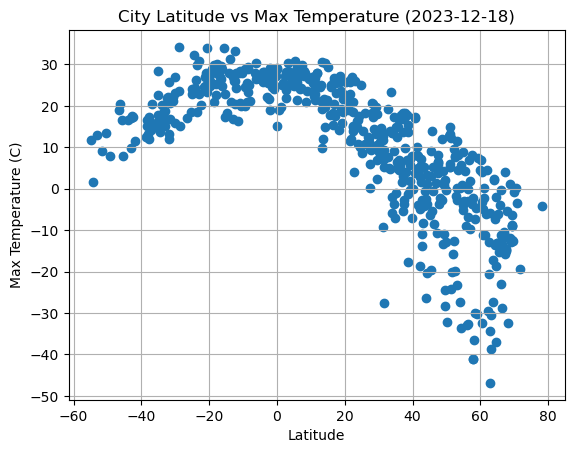

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature (2023-12-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

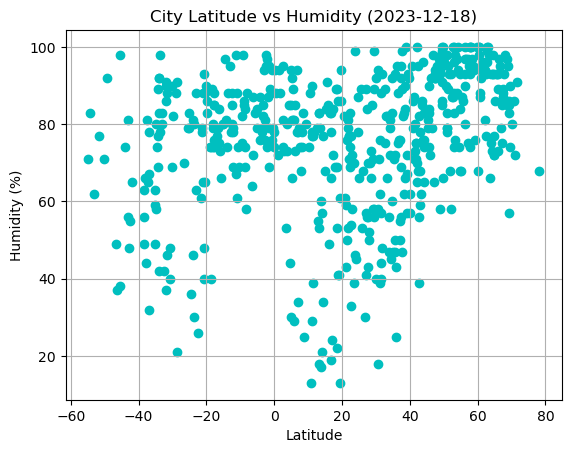

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c='c')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2023-12-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

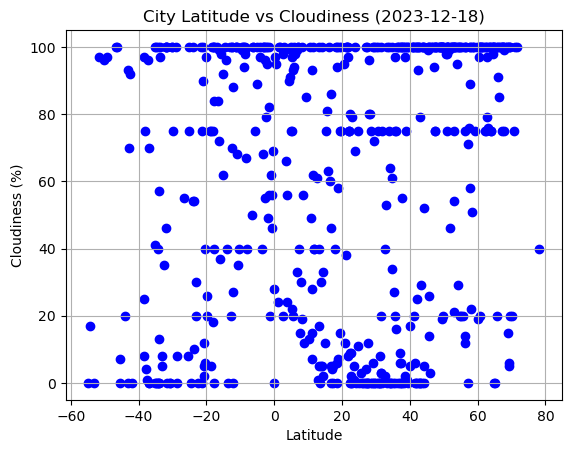

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c='b')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2023-12-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

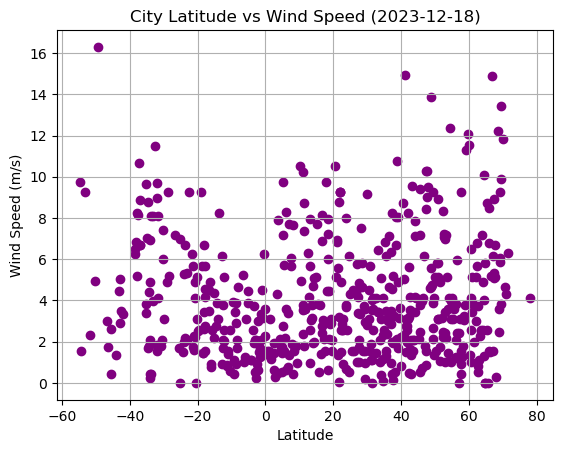

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c='purple')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2023-12-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def linReg(x, y):
    (slp, intcp, r, p, se) = linregress(x, y)
    reg = x * slp + intcp
    if intcp < 0:
        lin_eq = f'y = {str(round(slp,2))}x - {str(round(abs(intcp),2))}'
    else:
        lin_eq = f'y = {str(round(slp,2))}x + {str(round(intcp,2))}'
    return [slp, intcp, r, p, se, reg, lin_eq]

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-32.39,98,100,0.28,RU,1702947365
2,talnakh,69.4865,88.3972,-12.66,74,100,9.87,RU,1702947365
5,stanley,54.8680,-1.6985,8.77,84,100,3.97,GB,1702947082
9,winsford,53.1833,-2.5167,11.40,96,100,2.20,GB,1702947366
10,enewetak,11.3474,162.3373,27.28,77,62,8.72,MH,1702947366


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,17.28,92,0,2.06,ZA,1702947365
3,margaret river,-33.9500,115.0667,20.27,42,0,4.89,AU,1702947366
4,hermanus,-34.4187,19.2345,13.78,77,0,4.39,ZA,1702947366
6,mount gambier,-37.8333,140.7667,17.37,44,4,5.17,AU,1702947366
7,puerto natales,-51.7236,-72.4875,9.21,77,97,2.34,CL,1702947366


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7971951065005322


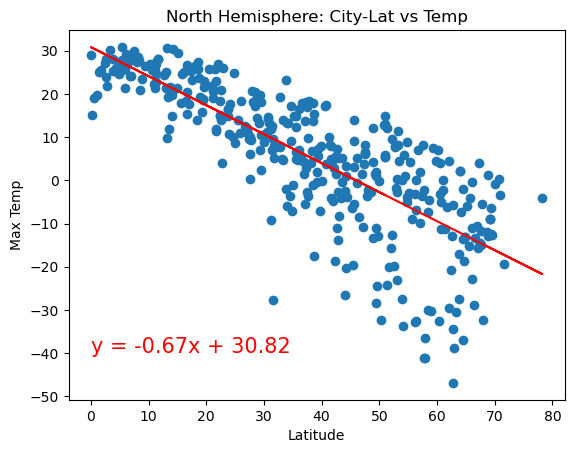

In [69]:
# Linear regression on Northern Hemisphere
x, y = northern_hemi_df['Lat'], northern_hemi_df['Max Temp']
result = linReg(x, y)  # return [slp, intcp, r, p, se, reg, lin_eq]

plt.scatter(x, y)
plt.plot(x, result[5], "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('North Hemisphere: City-Lat vs Temp')

plt.annotate(result[6],(0,-40),fontsize=15,color="red")
print(f'The r-value is: {result[2]}')

The r-value is: 0.6945432879484805


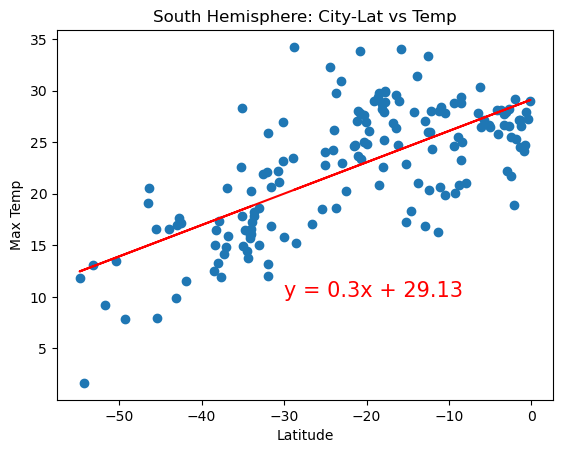

In [70]:
# Linear regression on Southern Hemisphere
x, y = southern_hemi_df['Lat'], southern_hemi_df['Max Temp']
result = linReg(x, y)  # return [slp, intcp, r, p, se, reg, lin_eq]

plt.scatter(x, y)
plt.plot(x, result[5], "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('South Hemisphere: City-Lat vs Temp')

plt.annotate(result[6],(-30,10),fontsize=15,color="red")
print(f'The r-value is: {result[2]}')

**Discussion about the linear relationship:** On observation date 12/18/23, both hemispheres have strong correlation between lat and temperature, i.e.the closer to equator, the hotter!

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4097607537092406


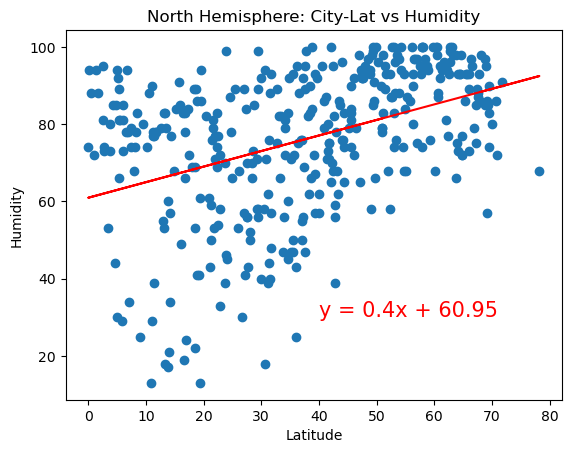

In [78]:
# Northern Hemisphere
x, y = northern_hemi_df['Lat'], northern_hemi_df['Humidity']
result = linReg(x, y)  # return [slp, intcp, r, p, se, reg, lin_eq]

plt.scatter(x, y)
plt.plot(x, result[5], "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('North Hemisphere: City-Lat vs Humidity')

plt.annotate(result[6],(40,30),fontsize=15,color="red")
print(f'The r-value is: {result[2]}')

The r-value is: 0.3549034078468535


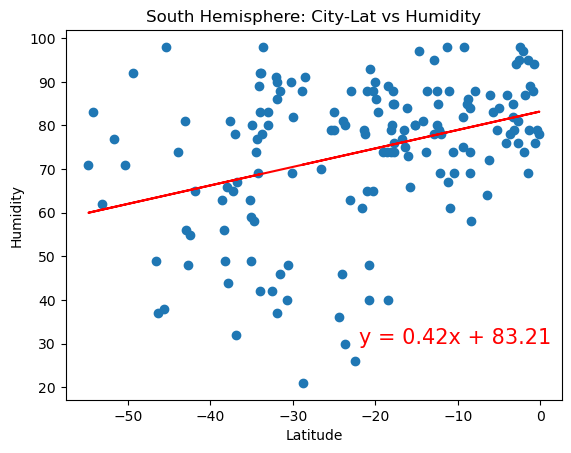

In [79]:
# Southern Hemisphere
x, y = southern_hemi_df['Lat'], southern_hemi_df['Humidity']
result = linReg(x, y)  # return [slp, intcp, r, p, se, reg, lin_eq]

plt.scatter(x, y)
plt.plot(x, result[5], "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('South Hemisphere: City-Lat vs Humidity')

plt.annotate(result[6],(-22,30),fontsize=15,color="red")
print(f'The r-value is: {result[2]}')

**Discussion about the linear relationship:** On observation date 12/18/23, both hemispheres have weak positive correlation between lat and humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25053186735764743


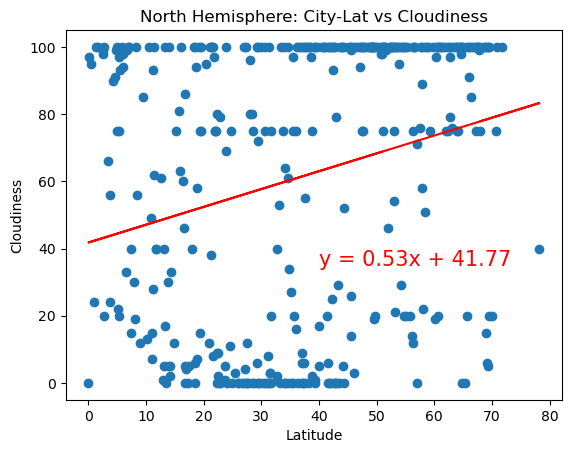

In [82]:
# Northern Hemisphere
x, y = northern_hemi_df['Lat'], northern_hemi_df['Cloudiness']
result = linReg(x, y)  # return [slp, intcp, r, p, se, reg, lin_eq]

plt.scatter(x, y)
plt.plot(x, result[5], "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('North Hemisphere: City-Lat vs Cloudiness')

plt.annotate(result[6],(40,35),fontsize=15,color="red")
print(f'The r-value is: {result[2]}')

The r-value is: 0.3049457074841174


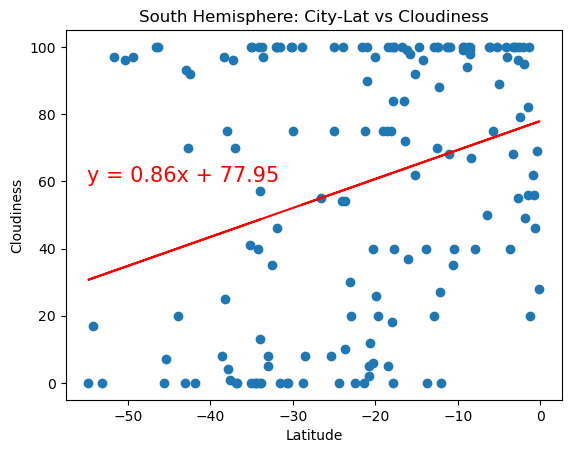

In [86]:
# Southern Hemisphere
x, y = southern_hemi_df['Lat'], southern_hemi_df['Cloudiness']
result = linReg(x, y)  # return [slp, intcp, r, p, se, reg, lin_eq]

plt.scatter(x, y)
plt.plot(x, result[5], "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('South Hemisphere: City-Lat vs Cloudiness')

plt.annotate(result[6],(-55,60),fontsize=15,color="red")
print(f'The r-value is: {result[2]}')

**Discussion about the linear relationship:** On observation date 12/18/23,  both hemispheres have weak positive correlation between lat and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13309830738738562


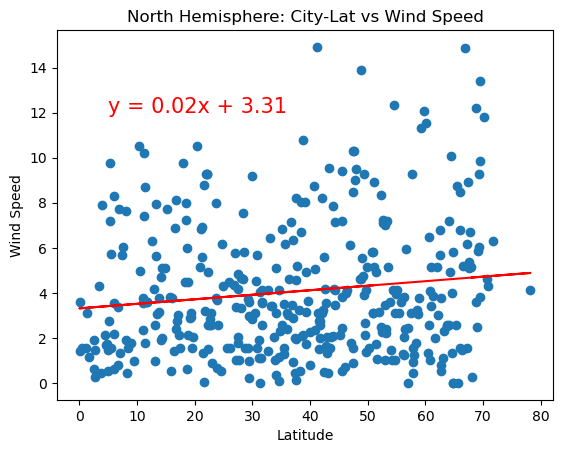

In [88]:
# Northern Hemisphere
x, y = northern_hemi_df['Lat'], northern_hemi_df['Wind Speed']
result = linReg(x, y)  # return [slp, intcp, r, p, se, reg, lin_eq]

plt.scatter(x, y)
plt.plot(x, result[5], "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('North Hemisphere: City-Lat vs Wind Speed')

plt.annotate(result[6],(5,12),fontsize=15,color="red")
print(f'The r-value is: {result[2]}')

The r-value is: -0.4148311872212894


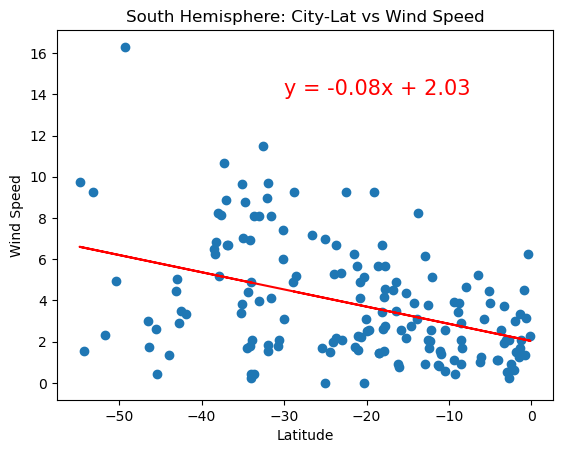

In [90]:
# Southern Hemisphere
x, y = southern_hemi_df['Lat'], southern_hemi_df['Wind Speed']
result = linReg(x, y)  # return [slp, intcp, r, p, se, reg, lin_eq]

plt.scatter(x, y)
plt.plot(x, result[5], "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('South Hemisphere: City-Lat vs Wind Speed')

plt.annotate(result[6],(-30,14),fontsize=15,color="red")
print(f'The r-value is: {result[2]}')

**Discussion about the linear relationship:** On observation date 12/18/23, in north hemisphere the correlation between lat and wind speed is positive but very weak. While in south hemisphere, the correlation between lat and wind speed moderate and negative.